In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:\\Users\\amado\\Desktop\\Ciencias de datos\\Bases de datos\\houses_to_rent.csv")

In [4]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [5]:
df=df.drop(['Unnamed: 0','hoa',
            'property tax','total'],axis='columns')

# Definición del problema

Crear un algorimo de regresión con el objetivo de predecir el costo de alquilier.

Area Tamaño de la casa de alquiler

Rooms número de habitaciones

Bathroom número de baños

Parkin Spaces cantidad de espacios para estacionar

Floor número de pisos del alquiler

Animal si acepta aniales o no

Furniture si la casa está amueblada o no

Fire insurence precio por el seguro contra incendios

Rent amount precio de alquiler

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   rent amount     6080 non-null   object
 9   fire insurance  6080 non-null   object
dtypes: int64(5), object(5)
memory usage: 475.1+ KB


Observamos que las variables fire insurence y rent amount son tipo objeto es decir texto, lo cual tendremos que preprocesarla 
para convertirlo en tipo numérico a su vez el dataset no contiene valores atípicos.

In [7]:
def remove_strings(col):
    
    df[col]=df[col].str.replace('R','')
    df[col]=df[col].str.replace('$','')
    df[col]=df[col].str.replace(',','')

Removemos los carácteres de tipo cadena.

In [8]:
for col in ['rent amount','fire insurance']:
    
    remove_strings(col)

In [9]:
df['fire insurance']=df['fire insurance'].astype(int)
df['rent amount']=df['rent amount'].astype(float)

In [10]:
df['floor']=np.where(df['floor']=='-','1',df['floor']).astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            6080 non-null   int64  
 1   area            6080 non-null   int64  
 2   rooms           6080 non-null   int64  
 3   bathroom        6080 non-null   int64  
 4   parking spaces  6080 non-null   int64  
 5   floor           6080 non-null   int32  
 6   animal          6080 non-null   object 
 7   furniture       6080 non-null   object 
 8   rent amount     6080 non-null   float64
 9   fire insurance  6080 non-null   int32  
dtypes: float64(1), int32(2), int64(5), object(2)
memory usage: 427.6+ KB


Observamos que hemos logrado con la tarea de tranformar las variables a tipo numérico.

In [12]:
{col:list(df[col].unique()) for col in df.select_dtypes('object')}

{'animal': ['acept', 'not acept'], 'furniture': ['furnished', 'not furnished']}

In [13]:
serie_animal=df['animal'].value_counts()
serie_furniture=df['furniture'].value_counts()


series={'Animal':serie_animal,
        'Furniture':serie_furniture}

In [14]:
def pie_plot(serie,title):
    
    
    serie.plot(kind='pie',title=title, figsize=[20,8],colors=['#77dd77','#fdfd96','#84b6f4','#fdcae1'],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*serie.sum()))

    plt.ylabel(None)

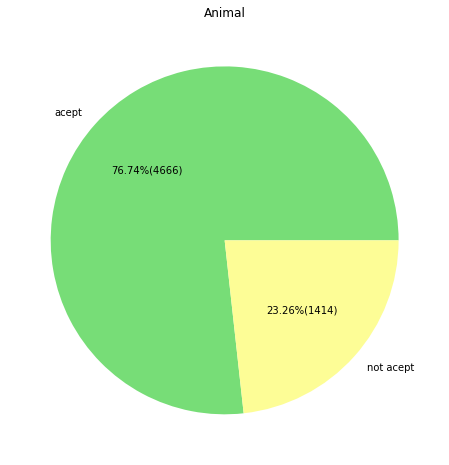

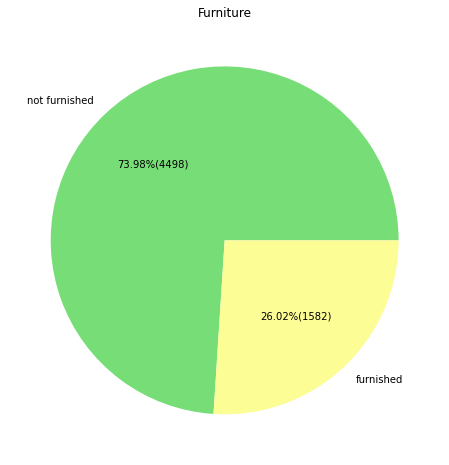

In [15]:
for i,j in series.items():
    
    plt.subplots(1,1)
    pie_plot(j,i)

In [16]:
sns.set_style(style='whitegrid')

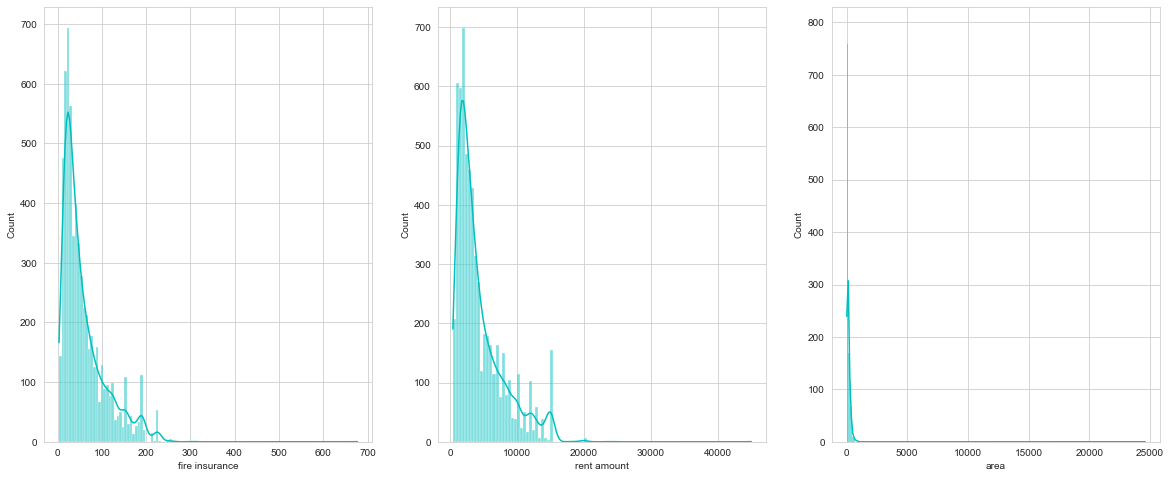

In [17]:
fig,(ax_1,ax_2,ax_3)=plt.subplots(1,3,figsize=(20,8))

sns.histplot(x=df['fire insurance'],ax=ax_1,kde=True,color='c')

sns.histplot(x=df['rent amount'],ax=ax_2,kde=True,color='c')

sns.histplot(x=df['area'],ax=ax_3,kde=True,color='c')

plt.show()

In [18]:
df[['rent amount','area','fire insurance']].describe()

,rent amount,area,fire insurance
count,6080.000000,6080.000000,6080.000000
mean,4395.844408,151.143914,58.204276
std,3576.668946,375.559485,49.313441
min,420.000000,10.000000,3.000000
25%,1800.000000,58.000000,23.000000
50%,3111.000000,100.000000,41.000000
75%,5952.500000,200.000000,77.000000
max,45000.000000,24606.000000,677.000000


## Eliminación de valores atípicos

Con el objetivo de minimizar el sesgo de nuestros datos y tener un mejor randimiento para nuestro modelo.

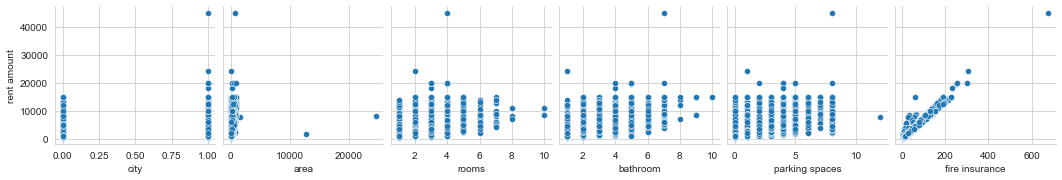

In [19]:
sns.pairplot(data=df,
             x_vars=['city','area','rooms','bathroom','parking spaces','fire insurance'],
             y_vars=['rent amount']
            )

plt.show()

In [20]:
df=df[df['rent amount']<12500]
df=df[df['area']<650]
df=df[df['bathroom']<8]
df[df['parking spaces']<7]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount,fire insurance
0,1,240,3,3,4,1,acept,furnished,8000.0,121
1,0,64,2,1,1,10,acept,not furnished,820.0,11
2,1,443,5,5,4,3,acept,furnished,7000.0,89
3,1,73,2,2,1,12,acept,not furnished,1250.0,16
4,1,19,1,1,0,1,not acept,not furnished,1200.0,16
...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,acept,not furnished,1150.0,15
6076,1,84,2,2,1,16,not acept,furnished,2900.0,37
6077,0,48,1,1,0,13,acept,not furnished,950.0,13
6078,1,160,3,2,2,1,not acept,not furnished,3500.0,53


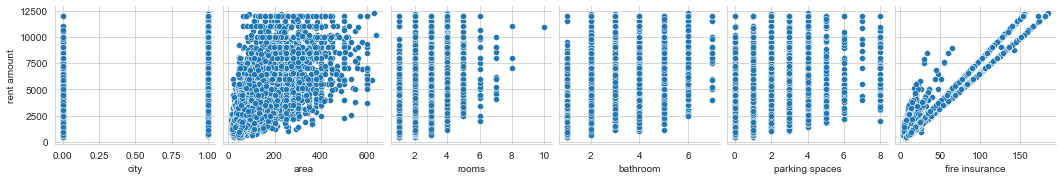

In [21]:
sns.pairplot(data=df,
             x_vars=['city','area','rooms','bathroom','parking spaces','fire insurance'],
             y_vars=['rent amount']
            )

plt.show()

In [22]:
df=df[df['rooms']<8]
df=df[df['fire insurance']>=10]

In [23]:
df=df[df['area']>10]

#### Tranformación logartimica

Para las variables fire insurance,area y rent amount hacemos una transformación logartimica con el objetivo de 
de darle un mejor procesamiento y suavilzado a los valores atípicos.

In [24]:
df['fire insurance']=np.log(df['fire insurance'])
df['area']=np.log(df['area'])
df['rent amount']=np.log(df['rent amount'])

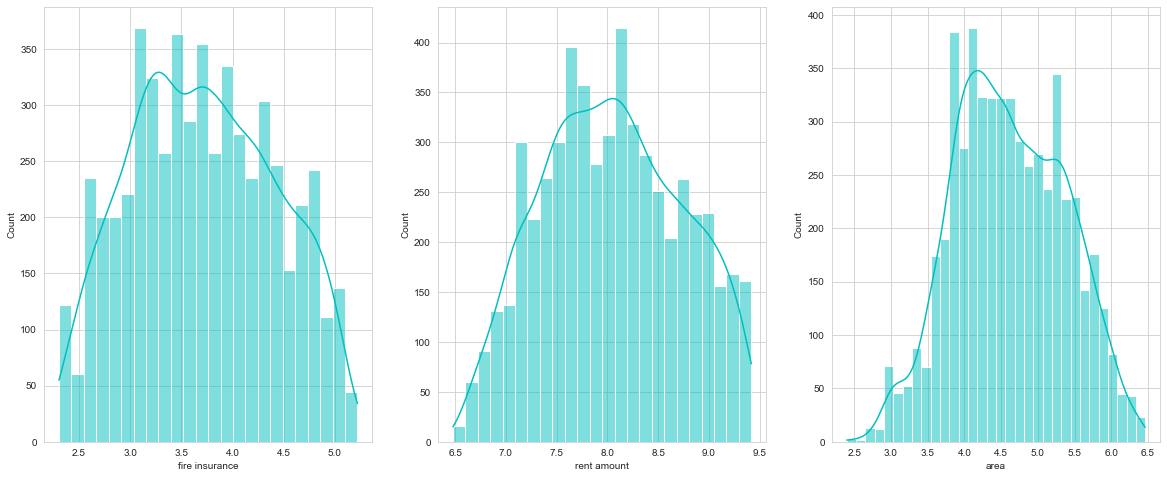

In [25]:
fig,(ax_1,ax_2,ax_3)=plt.subplots(1,3,figsize=(20,8))

sns.histplot(x=df['fire insurance'],ax=ax_1,color='c',kde=True)

sns.histplot(x=df['rent amount'],ax=ax_2,color='c',kde=True)

sns.histplot(x=df['area'],ax=ax_3,color='c',kde=True)

plt.show()

### ¿El precio de alquiler aumenta si está amueblada?

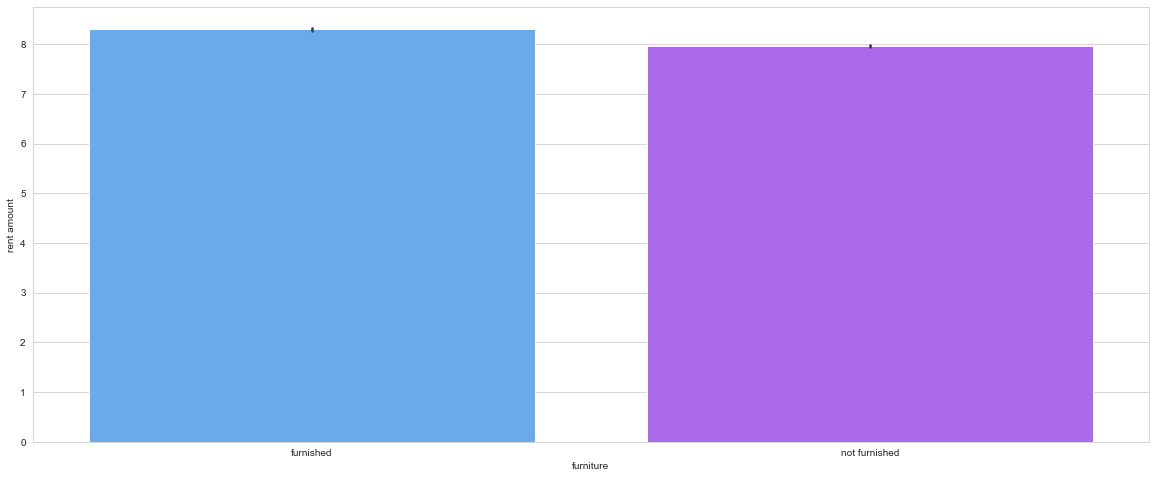

In [26]:
plt.subplots(1,1,figsize=(20,8))
sns.barplot(x='furniture',y='rent amount',data=df,palette='cool')
plt.show()

En efecto observamos que el precio es ligerarmente superior a las que no están amueblados.

### ¿ Aceptar animales en el departamento aumenta el precio del alquiler?

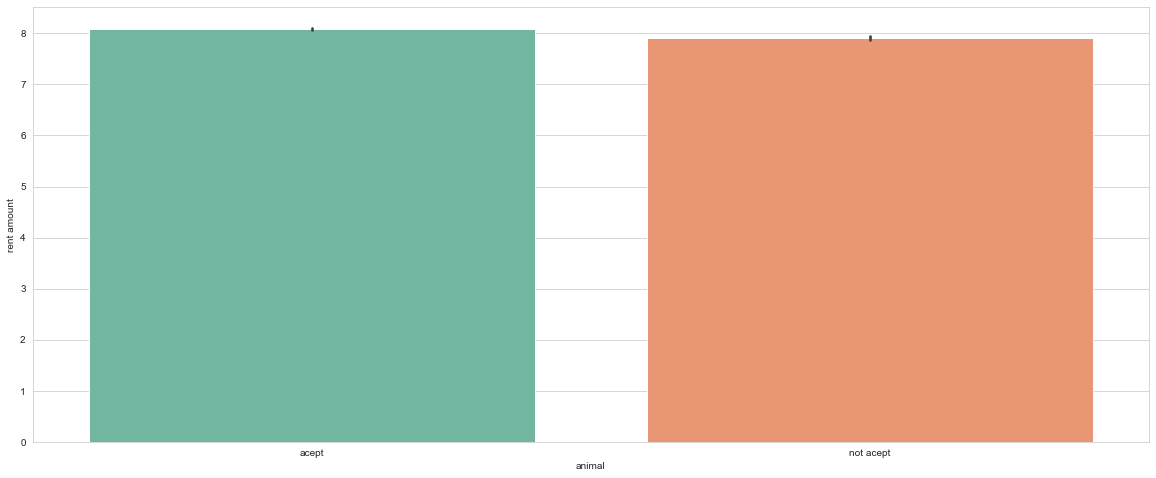

In [27]:
plt.subplots(1,1,figsize=(20,8))
sns.barplot(x='animal',y='rent amount',data=df,palette='Set2')
plt.show()

Aumenta el precio ligeramente.

In [28]:
df['furniture']=np.where(df['furniture']=='furnished',1,0)
df['animal']=np.where(df['animal']=='acept',1,0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 6079
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            5541 non-null   int64  
 1   area            5541 non-null   float64
 2   rooms           5541 non-null   int64  
 3   bathroom        5541 non-null   int64  
 4   parking spaces  5541 non-null   int64  
 5   floor           5541 non-null   int32  
 6   animal          5541 non-null   int32  
 7   furniture       5541 non-null   int32  
 8   rent amount     5541 non-null   float64
 9   fire insurance  5541 non-null   float64
dtypes: float64(3), int32(3), int64(4)
memory usage: 540.3 KB


# Creación del modelo

Daremos uso a un método de penalizacíon Ridge con el objetivo de evitar el sobreajuste y que minimize el peso del coeficiente para aquellos atributos que no son importantes para el precio de alquiler.

In [30]:
X=df.drop(['rent amount'],axis='columns')
y=df['rent amount']

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape,X_test.shape

((4432, 9), (1109, 9))

In [32]:
from sklearn.linear_model import RidgeCV

lm=RidgeCV()

In [33]:
lm.fit(X_train,Y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

### Métricas de desempeño

Usamos el R ajustado que nos ayuda a evaluar el grado de expxlicación del modelo entre más alto tendrá más capacidad explicativa.

El error cuadrático medio es la diferencia de error entre el valor original y el valor predicho.

In [34]:
lm.score(X_train,Y_train)

0.9487798135718256

In [35]:
lm.score(X_test,Y_test)

0.9452538276012279

### Validación cruzada

Es una técnica que consta en hacer submuestros aleatorios del dataframe con el objetivo de ver el porcentaje de generalización del modelo.

In [36]:
cross_val_score(lm,X_test,Y_test,cv=10).mean()

0.9432483917069134

Observamos que tiene un alto grado de confianza, lo cual indica que tiene un promedio de generalización de un 94%.

In [37]:
test=pd.DataFrame({'True values':np.exp(Y_test),
                   'Predicted values':np.exp(lm.predict(X_test))})

In [38]:
test[:50]

,True values,Predicted values
17,3500.0,3711.521165
2815,4500.0,4633.367229
552,4200.0,4075.395507
4542,4000.0,3778.816771
5016,7000.0,7057.542558
672,1590.0,1637.274708
1498,3500.0,3697.294812
5793,1200.0,1440.165420
953,1559.0,1564.439920
5425,1800.0,1795.451386


Observamos que tiene valores predichos muy cercanos a los originales.

In [39]:
def main():
    
    plt.scatter(test['True values'],test['Predicted values'],alpha=0.4,c='c',label='Predicted values')
    plt.plot(test['Predicted values'],test['Predicted values'],c='k',label='True values')
    plt.legend()

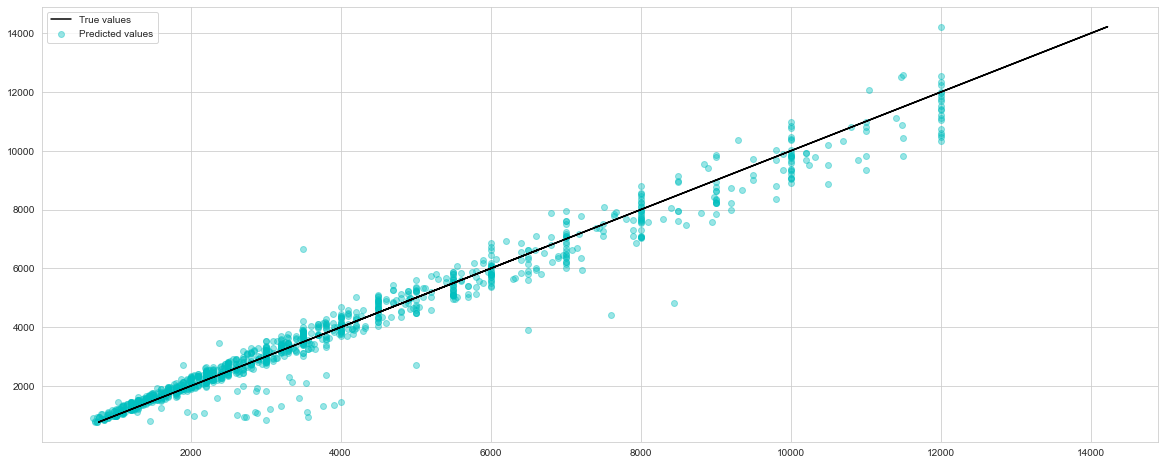

In [40]:
if __name__=='__main__':
    
    plt.subplots(1,1,figsize=(20,8))
    main()

La mayoria de los casos da predicciones muy cercanos a los valores reales.

### Guardamos el modelo

In [237]:
import joblib

joblib.dump(lm,'lm_rent_amount.pkl')

['lm_rent_amount.pkl']